<a href="https://colab.research.google.com/github/mukaseevru/ds-school/blob/main/lesson%2010/HW_lessons_9_10_(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Решение

Функция $f(x) = x_1^2 +5x_2^2$, точка $x^{(0)} = (1, 1)$

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def f(x):
    return x[0]**2+5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

# Градиентный спуск с постоянным шагом
def grad_descent_const_step(x=np.array([0, 0]), alpha=0.001, epsilon=0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

# Градиентный спуск с заранее заданным шагом
def grad_descent_series(x=np.array([0, 0]), epsilon=0.05):
    grad = grad_f(x)
    n = 0
    k = 1 
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        x = x - (1/k)*grad
        grad = grad_f(x)
        k+=1
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с заранее заданным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

# Градиентный спуск с дроблением шага
def grad_descent_step_splitting(x=np.array([0, 0]), alpha=1, epsilon=0.05, ksi=0.5, lambda_d=0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

# Метод наискорейшего градиентного спуска
def passive_search(x, grad, a = 0.0001, b = 0.9999, eps = 0.005):
    n = round((b-a)/eps)+1
    x_s = [a+i*eps for i in range(n)]
    y_s = [f(x-i*grad) for i in x_s]
    res = y_s.index(min(y_s))
    return x_s[res]

def grad_descent_series(x = np.array([0, 0]), epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        alp = passive_search(x, grad)
        x = x - alp*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Метод наискорейшего градиентного спуска выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

Градиентный спуск с постоянным шагом

In [3]:
x = grad_descent_const_step(x=np.array([1, 1]), alpha = 0.1)

Градиентный спуст с постоянным шагом выполнил 19 шагов
Точка с координатами х1 = 0.014411518807585589, x2 = 0.0


In [4]:
x = grad_descent_const_step(x=np.array([1, 1]), alpha=0.1/10)

Градиентный спуст с постоянным шагом выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = 3.426606593921724e-09


In [5]:
x = grad_descent_const_step(x=np.array([1, 1]), alpha=0.1/5)

Градиентный спуст с постоянным шагом выполнил 93 шагов
Точка с координатами х1 = 0.022450430469634797, x2 = 9.713344461128644e-10


In [6]:
x = grad_descent_const_step(x=np.array([1, 1]), alpha=0.1/2)

Градиентный спуст с постоянным шагом выполнил 38 шагов
Точка с координатами х1 = 0.018248003631400726, x2 = 3.637978807091713e-12


Градиентный спуск с дроблением шага

In [7]:
a = grad_descent_step_splitting(x=np.array([1, 1]), alpha=0.1)

Градиентный спуст с дроблением шага выполнил 20 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.01152921504606847, x2 = 0.0


In [8]:
a = grad_descent_step_splitting(x=np.array([1, 1]), alpha=0.1/10)

Градиентный спуст с дроблением шага выполнил 186 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.023337271504955483, x2 = 3.0839459345295514e-09


In [9]:
a = grad_descent_step_splitting(x=np.array([1, 1]), alpha=0.1/5)

Градиентный спуст с дроблением шага выполнил 94 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.021552413250849403, x2 = 7.770675568902916e-10


In [10]:
a = grad_descent_step_splitting(x=np.array([1, 1]), alpha=0.1/2)

Градиентный спуст с дроблением шага выполнил 39 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.016423203268260654, x2 = 1.8189894035458565e-12


### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

### Задание 4.
Дана следующая плотность вероятности для случайной величины Х:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте график данной плотности вероятности **[0.25 point]**

2. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

3. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 2 и 3 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. 

1. График плотности вероятности

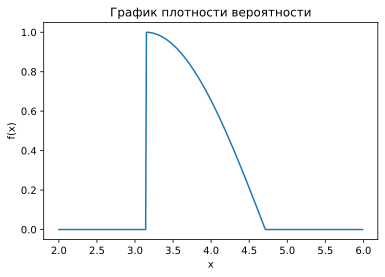

In [11]:
def f(x):
  y = []
  for i in x:
    if (i <= np.pi) or (i > (3/2)*np.pi):
      y.append(0)
    else:
      y.append(-np.cos(i))
  return y

x = np.arange(2, 6, 0.01)
fig, ax = plt.subplots()
ax.set_title('График плотности вероятности')
plt.ylabel('f(x)')
plt.xlabel('x')
sns.lineplot(x=x, y=f(x), ax=ax)

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


1. Случайная величина Х является непрерывной, т.к. все возможные значения целиком заполняют промежуток на числовой прямой

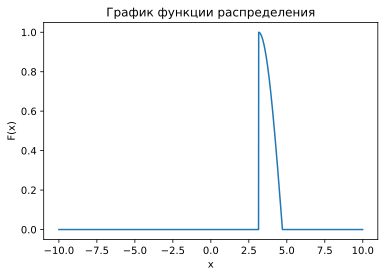

In [12]:
def F(x):
  y = []
  for i in x:
    if i <= 1:
      y.append(0)
    elif i > 2:
      y.append(1)
    else:
      y.append(i-1)
  return y

x = np.arange(-10, 10, 0.01)
fig, ax = plt.subplots()
ax.set_title('График функции распределения')
plt.ylabel('F(x)')
plt.xlabel('x')
sns.lineplot(x=x, y=f(x), ax=ax)

2. Плотность вероятности:
$$f(x)=F'(x)=\left\{\begin{array}{ll}\frac{1}{2-1}, x \in(1, 2] \\
0, x \notin(1, 2]
\end{array}\right.$$

3. Графики

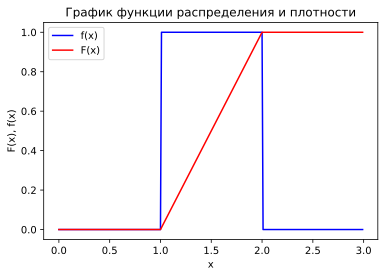

In [13]:
def f(x):
  y = []
  for i in x:
    if (i > 1) and (i <= 2):
      y.append(1)
    else:
      y.append(0)
  return y

x = np.arange(0, 3, 0.01)
fig, ax = plt.subplots()
ax.set_title('График функции распределения и плотности')
plt.ylabel('F(x), f(x)')
plt.xlabel('x')

sns.lineplot(x=x, y=f(x), ax=ax, color='b', label='f(x)')
sns.lineplot(x=x, y=F(x), ax=ax, color='r', label='F(x)')

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**